# Clase 1 - Banco

- Graficar la cantidad de usuarios respecto a sus estudios y también respecto a sus años cuantas personas hay.
- Onehotencoder de todas las cosas categoricas
- Hacer un PCA (Principal Component Analysis) en 2D
- Escoger 5 algoritmos con una FFN (Feed foward neural net)

In [2]:
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

Using TensorFlow backend.


In [3]:
bank = pd.read_csv('bank-full.csv', sep=";")
bank['default'] = bank['default'].apply(lambda x: 0 if x == 'no' else 1)
bank['housing'] = bank['housing'].apply(lambda x: 0 if x == 'no' else 1)
bank['loan'] = bank['loan'].apply(lambda x: 0 if x == 'no' else 1)
bank['y'] = bank['y'].apply(lambda x: 0 if x == 'no' else 1)
bank = bank.drop('contact', 1)
bank = bank.drop('poutcome', 1)
bank.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,0,2143,1,0,5,may,261,1,-1,0,0
1,44,technician,single,secondary,0,29,1,0,5,may,151,1,-1,0,0
2,33,entrepreneur,married,secondary,0,2,1,1,5,may,76,1,-1,0,0
3,47,blue-collar,married,unknown,0,1506,1,0,5,may,92,1,-1,0,0
4,33,unknown,single,unknown,0,1,0,0,5,may,198,1,-1,0,0


In [4]:
education_oh = pd.get_dummies(bank['education'])

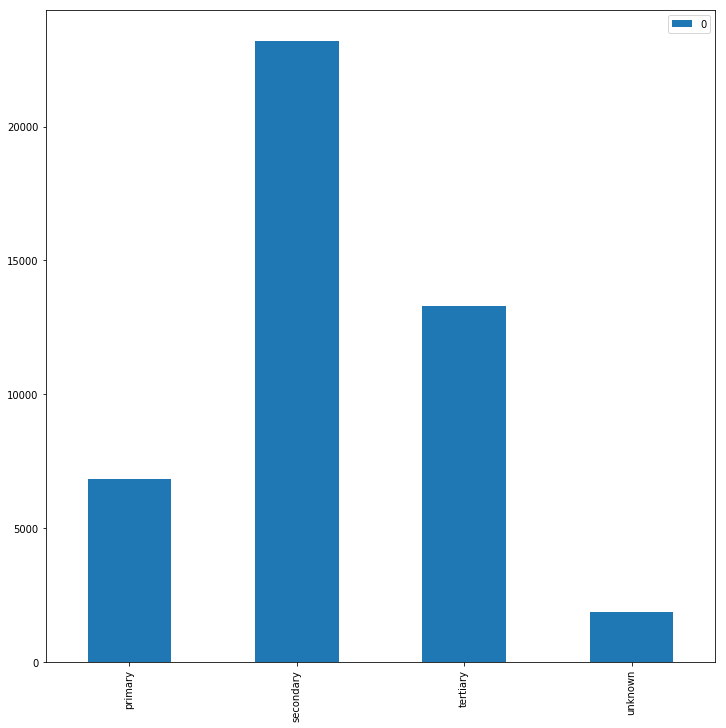

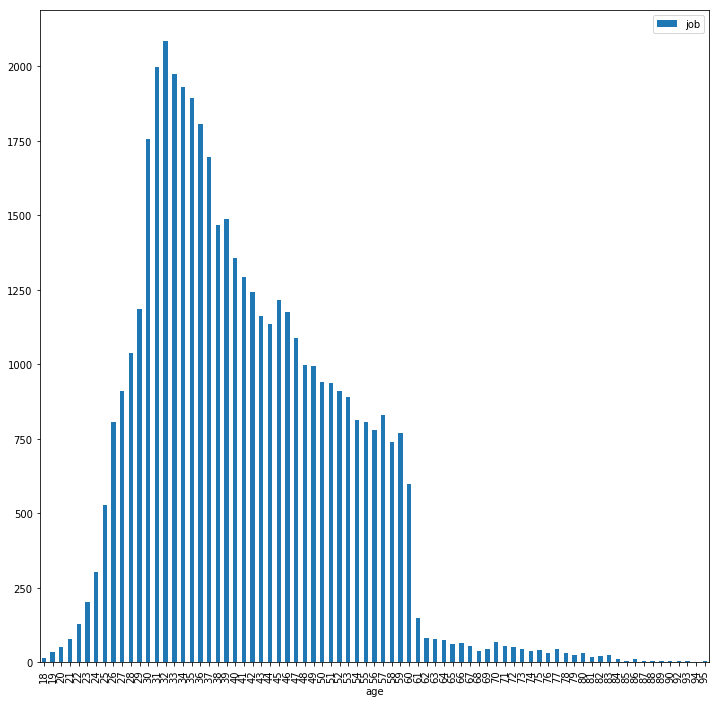

In [5]:
pd.DataFrame(education_oh.sum()).plot.bar(figsize=(12, 12))
bank.groupby("age").count()[["job"]].plot.bar(figsize=(12, 12))

In [6]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,0,2143,1,0,5,may,261,1,-1,0,0
1,44,technician,single,secondary,0,29,1,0,5,may,151,1,-1,0,0
2,33,entrepreneur,married,secondary,0,2,1,1,5,may,76,1,-1,0,0
3,47,blue-collar,married,unknown,0,1506,1,0,5,may,92,1,-1,0,0
4,33,unknown,single,unknown,0,1,0,0,5,may,198,1,-1,0,0


In [7]:
job_ohe = pd.get_dummies(bank[['job']])
marital_ohe = pd.get_dummies(bank[['marital']])
edu_ohe = pd.get_dummies(bank[['education']])
month_ohe = pd.get_dummies(bank[['month']])

In [8]:
data = bank
data = data.drop(['job', 'marital', 'education', 'month'], 1)
data = pd.concat([data, job_ohe, marital_ohe, edu_ohe, month_ohe], 1)
data.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,0,2143,1,0,5,261,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
1,44,0,29,1,0,5,151,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
2,33,0,2,1,1,5,76,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
3,47,0,1506,1,0,5,92,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
4,33,0,1,0,0,5,198,1,-1,0,...,0,0,0,0,0,0,1,0,0,0


In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(data)
principalDf = pd.DataFrame(data = principalComponents, columns = ['PC 1', 'PC 2'])
principalDf.head()

,PC 1,PC 2
0,780.732846,1.441469
1,-1333.470304,-104.671738
2,-1360.611763,-179.618926
3,143.419778,-166.385018
4,-1361.387655,-57.617397


In [10]:
finalDf = pd.concat([principalDf, bank['y']], 1)
finalDf.head()

,PC 1,PC 2,y
0,780.732846,1.441469,0
1,-1333.470304,-104.671738,0
2,-1360.611763,-179.618926,0
3,143.419778,-166.385018,0
4,-1361.387655,-57.617397,0


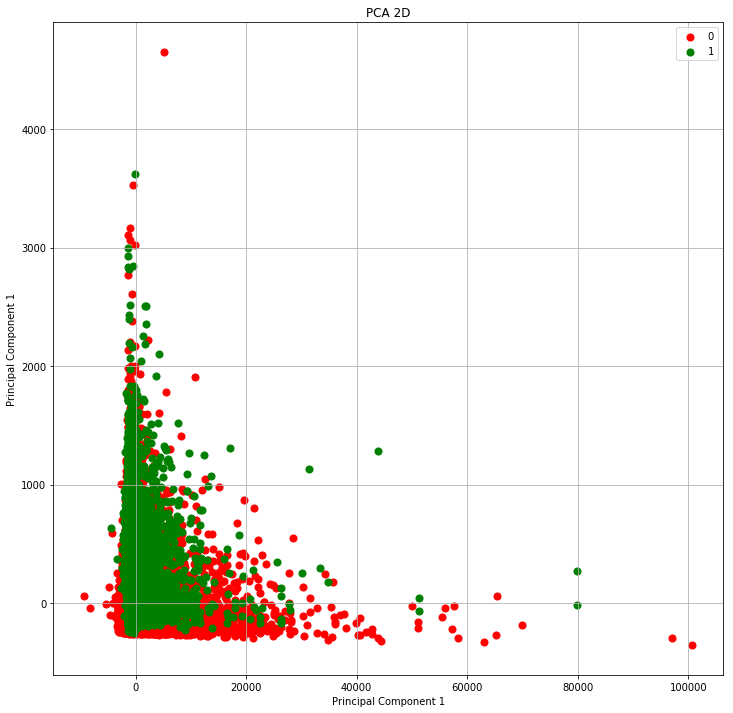

In [11]:
fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 1')
ax.set_title('PCA 2D')

targets = [0, 1]
colors = ['r','g', 'b']
for target, color in zip(targets, colors):
    indicesToKeep = finalDf['y'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC 1'],
              finalDf.loc[indicesToKeep, 'PC 2'],
              c = color,
              s = 50)
ax.legend(targets)
ax.grid()

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(principalDf, np.asarray(bank[['y']]))

# Feed-Foward Neural Network

In [13]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(2, input_dim = 2, activation = 'relu'))
model.add(Dense(4, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [14]:
model.fit(X_train, y_train, epochs = 20, batch_size = 10)

Epoch 1/20
33908/33908 [==============================] - 2s 70us/step - loss: 1.8889 - acc: 0.8230
Epoch 2/20
33908/33908 [==============================] - 3s 76us/step - loss: 0.7820 - acc: 0.8833
Epoch 3/20
33908/33908 [==============================] - 3s 78us/step - loss: 0.7563 - acc: 0.8833
Epoch 4/20
33908/33908 [==============================] - 3s 80us/step - loss: 0.4826 - acc: 0.8810
Epoch 5/20
33908/33908 [==============================] - 2s 69us/step - loss: 0.3012 - acc: 0.8833
Epoch 6/20
33908/33908 [==============================] - 2s 71us/step - loss: 0.3006 - acc: 0.8833
Epoch 7/20
33908/33908 [==============================] - 2s 67us/step - loss: 0.3008 - acc: 0.8833
Epoch 8/20
33908/33908 [==============================] - 2s 70us/step - loss: 0.2997 - acc: 0.8833
Epoch 9/20
33908/33908 [==============================] - 2s 64us/step - loss: 0.3006 - acc: 0.8833
Epoch 10/20
33908/33908 [==============================] - 2s 66us/step - loss: 0.2992 - acc: 0.8833

In [15]:
scores = model.evaluate(X_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

11303/11303 [==============================] - 0s 13us/step

acc: 88.22%


In [16]:
def round_predictions(predict):
    return [round(x[0]) for x in predict]

In [17]:
predict = model.predict(X_test)
y_tested = np.squeeze(np.asanyarray(y_test))

In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(round_predictions(predict), y_tested)

0.8821551800406972

# Linear Model

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
regressor = LinearRegression()
regressor = regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [20]:
accuracy_score(round_predictions(y_pred), y_tested)

0.8859594797841281

# Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, random_state = 0)
classifier.fit(X_train, y_train)
y_predRF = classifier.predict(X_test)

c:\users\jgs808\appdata\local\continuum\anaconda3\envs\keras\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
c:\users\jgs808\appdata\local\continuum\anaconda3\envs\keras\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [22]:
accuracy_score(y_predRF, y_tested)

0.8710961691586304

# Support Vector Classification

In [23]:
from sklearn.svm import SVC
svmClf = SVC()
svmClf.fit(X_train, y_train)
y_predSVM = svmClf.predict(X_test)

c:\users\jgs808\appdata\local\continuum\anaconda3\envs\keras\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [24]:
accuracy_score(y_predSVM, y_tested)

0.8814474033442449